<a href="https://colab.research.google.com/github/shrutia898/Score-Keeper/blob/main/RiskTagFrequencyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import pandas library to help display dataset on Google Collab

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Step 2: variable df calls pandas function read_excel aimed at webacy data set and prints the first 5 rows using .head function

In [18]:
df = pd.read_excel('compiled_risk_data.xlsx');
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                1093 non-null   object
 1   Smart contract address                      1093 non-null   object
 2   Blog post link                              1093 non-null   object
 3   Audit website                               1093 non-null   object
 4   Chain                                       1093 non-null   object
 5   Is_closed_source                            1093 non-null   bool  
 6   hidden_owner                                1093 non-null   bool  
 7   anti_whale_modifiable                       1093 non-null   bool  
 8   Is_anti_whale                               1093 non-null   bool  
 9   Is_honeypot                                 1093 non-null   bool  
 10  buy_tax                 

In [23]:
df['is_airdrop_scam'].value_counts()

is_airdrop_scam
False    1024
True       69
Name: count, dtype: int64

In [24]:
#defining all risks in an array, so .value_counts() can be ran on all risks at the same time
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

In [27]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

Is_closed_source                   146
hidden_owner                       164
anti_whale_modifiable              122
Is_anti_whale                      155
Is_honeypot                         94
buy_tax                            128
sell_tax                           126
slippage_modifiable                149
Is_blacklisted                      81
can_take_back_ownership            194
owner_change_balance               222
is_airdrop_scam                     69
selfdestruct                       116
trust_list                         149
is_whitelisted                     109
is_fake_token                       90
illegal_unicode                     62
exploitation                       468
bad_contract                       373
reusing_state_variable             124
encode_packed_collision             81
encode_packed_parameters            87
centralized_risk_medium            283
centralized_risk_high              205
centralized_risk_low               190
event_setter             

<ipython-input-28-4db283aabe4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


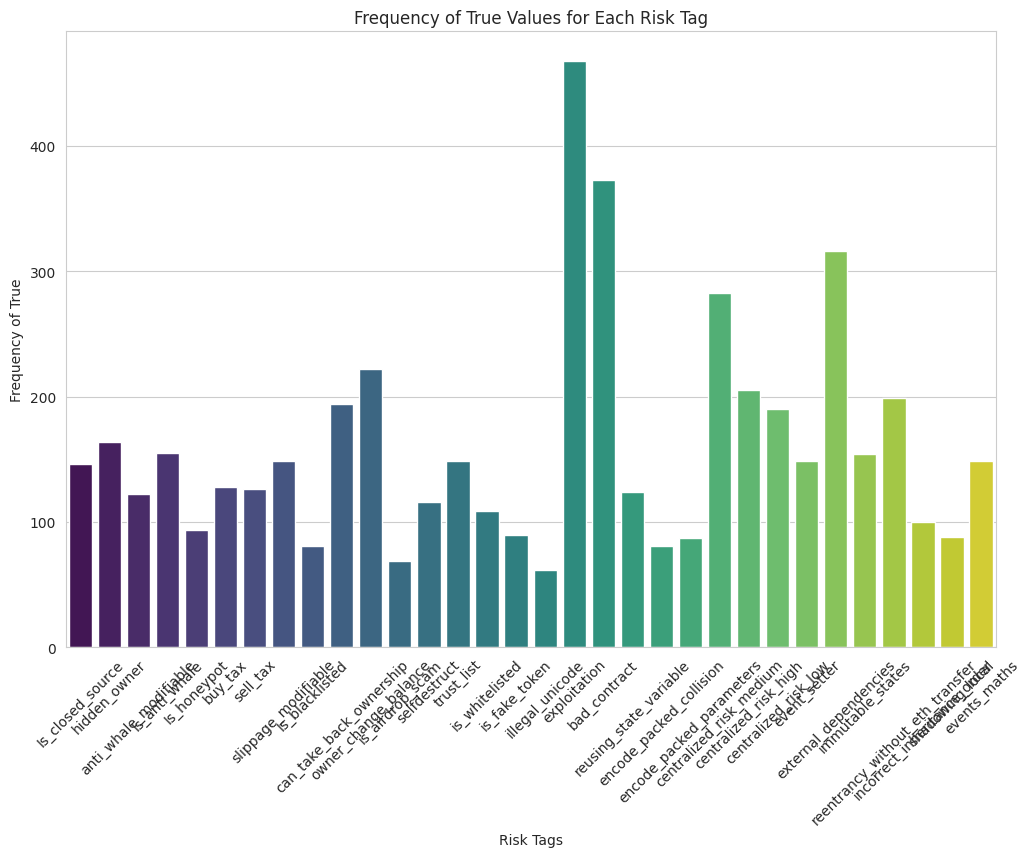

In [28]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()

## False Risk Tags Practice Using Python Libraries


In [29]:
falseFrequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[False]
falseFrequencies = falseFrequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
falseFrequencies

Is_closed_source                    947
hidden_owner                        929
anti_whale_modifiable               971
Is_anti_whale                       938
Is_honeypot                         999
buy_tax                             965
sell_tax                            967
slippage_modifiable                 944
Is_blacklisted                     1012
can_take_back_ownership             899
owner_change_balance                871
is_airdrop_scam                    1024
selfdestruct                        977
trust_list                          944
is_whitelisted                      984
is_fake_token                      1003
illegal_unicode                    1031
exploitation                        625
bad_contract                        720
reusing_state_variable              969
encode_packed_collision            1012
encode_packed_parameters           1006
centralized_risk_medium             810
centralized_risk_high               888
centralized_risk_low                903


<ipython-input-30-ae57cffb54d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=falseFrequencies.index, y=falseFrequencies.values, palette='viridis')


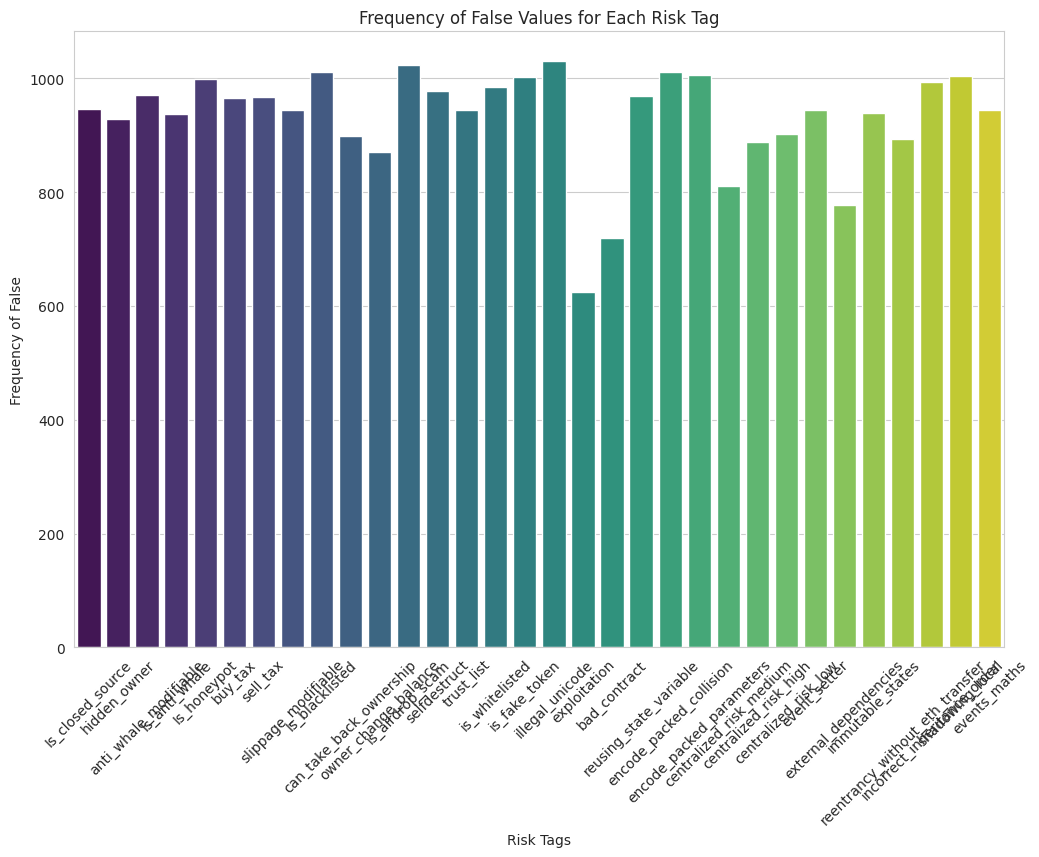

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=falseFrequencies.index, y=falseFrequencies.values, palette='viridis')
plt.title('Frequency of False Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of False')
plt.xticks(rotation=45)
plt.show()